In [3]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Query3-AnnualDebttoEBITDA.csv')

In [3]:
df = df[df['indfmt'] == 'INDL']
df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,cusip,conm,curcd,dd1,dlc,dltt,ebit,ebitda,costat,debt,ebitdatodebt
0,1013,31-Oct-94,1994.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,0.400,0.400,0.410,64.379,86.037,I,1.210,71.10495868
1,1013,31-Oct-95,1995.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,0.410,0.410,0.000,84.238,110.579,I,0.820,134.852439
2,1013,31-Oct-96,1996.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,2.247,2.247,6.913,133.184,166.978,I,11.407,14.63820461
3,1013,31-Oct-97,1997.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,0.650,0.650,3.109,188.364,238.207,I,4.409,54.02744386
4,1013,31-Oct-98,1998.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,0.735,200.735,2.769,225.566,290.675,I,204.239,1.423210063


In [4]:
np.argmax(df['ebitda'])

16537

In [5]:
df.iloc[18998]

gvkey                         29241
datadate                  30-Jun-94
fyear                        1994.0
indfmt                         INDL
consol                            C
popsrc                            D
datafmt                         STD
cusip                     925550105
conm            VIAVI SOLUTIONS INC
curcd                           USD
dd1                           0.132
dlc                           0.132
dltt                            0.0
ebit                          2.592
ebitda                        3.533
costat                            A
debt                          0.264
ebitdatodebt            13.38257576
Name: 21763, dtype: object

In [6]:
df_inf = df[df['debt'] == 0]

In [7]:
df_inf.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,cusip,conm,curcd,dd1,dlc,dltt,ebit,ebitda,costat,debt,ebitdatodebt
218,1274,31-Dec-08,2008.0,INDL,C,D,STD,17175100,ALLEGHANY CORP,USD,0.0,0.0,0.0,110.152,135.826,I,0.0,#DIV/0!
220,1274,31-Dec-09,2009.0,INDL,C,D,STD,17175100,ALLEGHANY CORP,USD,0.0,0.0,0.0,430.213,462.571,I,0.0,#DIV/0!
282,1327,30-Sep-12,2012.0,INDL,C,D,STD,83088M102,SKYWORKS SOLUTIONS INC,USD,0.0,0.0,0.0,278.860,381.149,A,0.0,#DIV/0!
283,1327,30-Sep-13,2013.0,INDL,C,D,STD,83088M102,SKYWORKS SOLUTIONS INC,USD,0.0,0.0,0.0,353.600,457.000,A,0.0,#DIV/0!
284,1327,30-Sep-14,2014.0,INDL,C,D,STD,83088M102,SKYWORKS SOLUTIONS INC,USD,0.0,0.0,0.0,571.200,693.900,A,0.0,#DIV/0!


In [8]:
df['indicator zero'] = df.apply(lambda x: x["ebitda"]>=0 and x["debt"]>0, axis=1) # 90% case
df.head()

def d(x):
    if x["indicator zero"] == True:
        return x['ebitdatodebt'] 
    else: 
        return 0
    
df['ebitda_adj'] = df.apply(lambda x: d(x), axis=1)

In [9]:
df.head(50)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,cusip,conm,curcd,dd1,dlc,dltt,ebit,ebitda,costat,debt,ebitdatodebt,indicator zero,ebitda_adj
0,1013,31-Oct-94,1994.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,0.400,0.400,0.410,64.379,86.037,I,1.210,71.10495868,True,71.10495868
1,1013,31-Oct-95,1995.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,0.410,0.410,0.000,84.238,110.579,I,0.820,134.852439,True,134.852439
2,1013,31-Oct-96,1996.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,2.247,2.247,6.913,133.184,166.978,I,11.407,14.63820461,True,14.63820461
3,1013,31-Oct-97,1997.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,0.650,0.650,3.109,188.364,238.207,I,4.409,54.02744386,True,54.02744386
4,1013,31-Oct-98,1998.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,0.735,200.735,2.769,225.566,290.675,I,204.239,1.423210063,True,1.423210063
5,1013,31-Oct-99,1999.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,10.152,35.152,11.024,311.649,413.739,I,56.328,7.345174691,True,7.345174691
6,1013,31-Oct-00,2000.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,28.500,28.500,16.500,523.900,670.100,I,73.500,9.117006803,True,9.117006803
7,1013,31-Oct-01,2001.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,1.700,1.700,3.000,-253.400,-55.600,I,6.400,-8.6875,False,0
8,1013,31-Oct-02,2002.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,0.000,15.700,10.800,-297.100,-192.400,I,26.500,-7.260377358,False,0
9,1013,31-Oct-03,2003.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,8.300,8.300,400.000,-39.300,19.900,I,416.600,0.047767643,True,0.047767643


In [10]:
df['loss_NDPOS'] = df.apply(lambda x: x["ebitda"]<0 and x["debt"]>0, axis=1)

In [11]:
df['loss_NDNEG'] = df.apply(lambda x: x["ebitda"]<0 and x["debt"]<=0, axis=1)

In [12]:
df['PROFIT_NDNEG'] = df.apply(lambda x: x["ebitda"]>=0 and x["debt"]<=0, axis=1)

In [13]:
df.head(50)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,cusip,conm,curcd,...,ebit,ebitda,costat,debt,ebitdatodebt,indicator zero,ebitda_adj,loss_NDPOS,loss_NDNEG,PROFIT_NDNEG
0,1013,31-Oct-94,1994.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,64.379,86.037,I,1.210,71.10495868,True,71.10495868,False,False,False
1,1013,31-Oct-95,1995.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,84.238,110.579,I,0.820,134.852439,True,134.852439,False,False,False
2,1013,31-Oct-96,1996.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,133.184,166.978,I,11.407,14.63820461,True,14.63820461,False,False,False
3,1013,31-Oct-97,1997.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,188.364,238.207,I,4.409,54.02744386,True,54.02744386,False,False,False
4,1013,31-Oct-98,1998.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,225.566,290.675,I,204.239,1.423210063,True,1.423210063,False,False,False
5,1013,31-Oct-99,1999.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,311.649,413.739,I,56.328,7.345174691,True,7.345174691,False,False,False
6,1013,31-Oct-00,2000.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,523.900,670.100,I,73.500,9.117006803,True,9.117006803,False,False,False
7,1013,31-Oct-01,2001.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,-253.400,-55.600,I,6.400,-8.6875,False,0,True,False,False
8,1013,31-Oct-02,2002.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,-297.100,-192.400,I,26.500,-7.260377358,False,0,True,False,False
9,1013,31-Oct-03,2003.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,-39.300,19.900,I,416.600,0.047767643,True,0.047767643,False,False,False


In [14]:
df['loss_NDPOS'] = df['loss_NDPOS'].replace({True: 1, False: 0})
df['loss_NDNEG'] = df['loss_NDNEG'].replace({True: 1, False: 0})
df['PROFIT_NDNEG'] = df['PROFIT_NDNEG'].replace({True: 1, False: 0})

In [15]:
df.head(50)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,cusip,conm,curcd,...,ebit,ebitda,costat,debt,ebitdatodebt,indicator zero,ebitda_adj,loss_NDPOS,loss_NDNEG,PROFIT_NDNEG
0,1013,31-Oct-94,1994.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,64.379,86.037,I,1.210,71.10495868,True,71.10495868,0,0,0
1,1013,31-Oct-95,1995.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,84.238,110.579,I,0.820,134.852439,True,134.852439,0,0,0
2,1013,31-Oct-96,1996.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,133.184,166.978,I,11.407,14.63820461,True,14.63820461,0,0,0
3,1013,31-Oct-97,1997.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,188.364,238.207,I,4.409,54.02744386,True,54.02744386,0,0,0
4,1013,31-Oct-98,1998.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,225.566,290.675,I,204.239,1.423210063,True,1.423210063,0,0,0
5,1013,31-Oct-99,1999.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,311.649,413.739,I,56.328,7.345174691,True,7.345174691,0,0,0
6,1013,31-Oct-00,2000.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,523.900,670.100,I,73.500,9.117006803,True,9.117006803,0,0,0
7,1013,31-Oct-01,2001.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,-253.400,-55.600,I,6.400,-8.6875,False,0,1,0,0
8,1013,31-Oct-02,2002.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,-297.100,-192.400,I,26.500,-7.260377358,False,0,1,0,0
9,1013,31-Oct-03,2003.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,-39.300,19.900,I,416.600,0.047767643,True,0.047767643,0,0,0


In [16]:
df.describe() # check for edibta to debt ratio in column here???

,gvkey,fyear,dd1,dlc,dltt,ebit,ebitda,debt,loss_NDPOS,loss_NDNEG,PROFIT_NDNEG
count,28593.000000,28583.000000,26498.000000,28302.000000,28241.000000,28111.000000,26848.000000,28593.000000,28593.000000,28593.000000,28593.000000
mean,41339.410695,2006.690620,119.439624,370.804019,1229.575906,341.559503,480.610610,1692.157510,0.040010,0.008708,0.083587
std,52824.932376,8.245234,613.699004,3175.141544,3768.118706,754.683721,915.194172,6127.811741,0.195986,0.092913,0.276772
min,1013.000000,1993.000000,0.000000,0.000000,0.000000,-25913.000000,-21913.000000,0.000000,0.000000,0.000000,0.000000
25%,8133.000000,2000.000000,0.000000,0.302000,38.400000,50.994000,83.720500,67.598000,0.000000,0.000000,0.000000
50%,17120.000000,2006.000000,5.347500,14.837500,347.400000,155.800000,229.109000,442.977000,0.000000,0.000000,0.000000
75%,61420.000000,2014.000000,45.235750,112.289000,1183.953000,372.990000,528.148250,1484.167000,0.000000,0.000000,0.000000
max,326688.000000,2022.000000,18199.600000,179770.000000,147288.879000,22267.000000,23254.000000,248308.000000,1.000000,1.000000,1.000000


In [17]:
df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,cusip,conm,curcd,...,ebit,ebitda,costat,debt,ebitdatodebt,indicator zero,ebitda_adj,loss_NDPOS,loss_NDNEG,PROFIT_NDNEG
0,1013,31-Oct-94,1994.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,64.379,86.037,I,1.210,71.10495868,True,71.10495868,0,0,0
1,1013,31-Oct-95,1995.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,84.238,110.579,I,0.820,134.852439,True,134.852439,0,0,0
2,1013,31-Oct-96,1996.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,133.184,166.978,I,11.407,14.63820461,True,14.63820461,0,0,0
3,1013,31-Oct-97,1997.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,188.364,238.207,I,4.409,54.02744386,True,54.02744386,0,0,0
4,1013,31-Oct-98,1998.0,INDL,C,D,STD,886309,ADC TELECOMMUNICATIONS INC,USD,...,225.566,290.675,I,204.239,1.423210063,True,1.423210063,0,0,0


In [18]:
df_returns = pd.read_excel('Excel03 Data 20230128.xlsx', sheet_name='ret06')
df_returns.head()

,PERMNO,DATE,CUSIP,COMNAM,TICKER,PERMCO,SHRCD,VOL,RET,RETX,...,d_4801_Banks,d_4802_Finance_NEC,d_4803_Insurance,d_4885_Real_Estate_Dev,d_4890_REIT,d_4900_Communications,d_6000_Miscellaneous,numrets,retadj,abretadj
0,50906,1995-01-31,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,34941,-0.020000,-0.020000,...,0,0,0,0,0,0,0,191,-0.020000,-0.030476
1,50906,1995-02-28,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,60361,0.137755,0.137755,...,0,0,0,0,0,0,0,191,0.137755,0.085375
2,50906,1995-03-31,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,87371,0.058296,0.058296,...,0,0,0,0,0,0,0,191,0.058296,0.040914
3,50906,1995-04-28,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,78824,0.118644,0.118644,...,0,0,0,0,0,0,0,191,0.118644,0.098568
4,50906,1995-05-31,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,95578,-0.060606,-0.060606,...,0,0,0,0,0,0,0,191,-0.060606,-0.084710


In [19]:
#print(type(df['DATE']))
df_returns['PREYEARMONTH'] = df_returns['DATE'] - pd.DateOffset(years=1)

In [20]:
print(pd.Timestamp("2015-12-31") - pd.DateOffset(years=1))

2014-12-31 00:00:00


In [21]:
df_returns.head()

,PERMNO,DATE,CUSIP,COMNAM,TICKER,PERMCO,SHRCD,VOL,RET,RETX,...,d_4802_Finance_NEC,d_4803_Insurance,d_4885_Real_Estate_Dev,d_4890_REIT,d_4900_Communications,d_6000_Miscellaneous,numrets,retadj,abretadj,PREYEARMONTH
0,50906,1995-01-31,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,34941,-0.020000,-0.020000,...,0,0,0,0,0,0,191,-0.020000,-0.030476,1994-01-31
1,50906,1995-02-28,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,60361,0.137755,0.137755,...,0,0,0,0,0,0,191,0.137755,0.085375,1994-02-28
2,50906,1995-03-31,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,87371,0.058296,0.058296,...,0,0,0,0,0,0,191,0.058296,0.040914,1994-03-31
3,50906,1995-04-28,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,78824,0.118644,0.118644,...,0,0,0,0,0,0,191,0.118644,0.098568,1994-04-28
4,50906,1995-05-31,00088630,A D C TELECOMMUNICATIONS INC,ADCT,2902,11,95578,-0.060606,-0.060606,...,0,0,0,0,0,0,191,-0.060606,-0.084710,1994-05-31


In [22]:
#Adjust cusips to have a length of 8
def cusip_adjustment(x):
    cusip_length = len(str(x['cusip']))
    if cusip_length < 8:
        final = '0' * (8 - cusip_length) + str(x['cusip'])
    elif cusip_length > 8:
        final = str(x['cusip'])[:-(cusip_length - 8)]
    else:
        final = str(x['cusip'])
    return final

In [23]:
df['cusip8'] = df.apply(lambda x: cusip_adjustment(x), axis=1)

In [24]:
df_returns['DATE'] = pd.to_datetime(df_returns['DATE'])
df_returns['PREYEARMONTH'] = pd.to_datetime(df_returns['PREYEARMONTH'])
df['datadate'] = pd.to_datetime(df['datadate'])

In [25]:
df['cusip'] = df['cusip8']
df_returns['cusip'] = df_returns['CUSIP']

In [43]:
out = df_returns.merge(df, how='left', on=['cusip']).query('datadate.between(PREYEARMONTH, DATE, inclusive="left")')

In [44]:
#out.head()
import datetime
out_specific = out[out['CUSIP'] == '00130H10']
out_specific.head(50)
#print(type(out_specific['DATE'].iloc[0]))

,PERMNO,DATE,CUSIP,COMNAM,TICKER,PERMCO,SHRCD,VOL,RET,RETX,...,ebitda,costat,debt,ebitdatodebt,indicator zero,ebitda_adj,loss_NDPOS,loss_NDNEG,PROFIT_NDNEG,cusip8
1104,76712,1995-01-31,00130H10,A E S CORP,AESC,10996,11,23030,-0.102564,-0.102564,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10
1133,76712,1995-02-28,00130H10,A E S CORP,AESC,10996,11,24980,0.057143,0.057143,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10
1162,76712,1995-03-31,00130H10,A E S CORP,AESC,10996,11,28647,-0.040541,-0.040541,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10
1191,76712,1995-04-28,00130H10,A E S CORP,AESC,10996,11,24172,-0.028169,-0.028169,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10
1220,76712,1995-05-31,00130H10,A E S CORP,AESC,10996,11,34967,0.014493,0.014493,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10
1249,76712,1995-06-30,00130H10,A E S CORP,AESC,10996,11,37236,0.085714,0.085714,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10
1278,76712,1995-07-31,00130H10,A E S CORP,AESC,10996,11,38947,-0.006579,-0.006579,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10
1307,76712,1995-08-31,00130H10,A E S CORP,AESC,10996,11,24287,-0.019868,-0.019868,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10
1336,76712,1995-09-29,00130H10,A E S CORP,AESC,10996,11,26898,0.027027,0.027027,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10
1365,76712,1995-10-31,00130H10,A E S CORP,AESC,10996,11,30830,0.039474,0.039474,...,275.5,A,1265.7,0.217666114,True,0.217666114,0.0,0.0,0.0,00130H10


In [36]:
out_specific = out_specific.iloc[pd.DatetimeIndex(out_specific['DATE']).indexer_between_time(datetime.time(8,20,0),
                                                             datetime.time(8,27,0))]
out_specific.head()


,PERMNO,DATE,CUSIP,COMNAM,TICKER,PERMCO,SHRCD,VOL,RET,RETX,...,ebitda,costat,debt,ebitdatodebt,indicator zero,ebitda_adj,loss_NDPOS,loss_NDNEG,PROFIT_NDNEG,cusip8


In [29]:
out.to_csv('merged.csv')

In [46]:
df_merged = pd.read_csv ('merged.csv')

In [55]:

df_adj = df_merged[df_merged['ebitda_adj'] > 0]
y = df_adj['RETX'] #abnormal returns
x = df_adj['ebitda_adj']
print(y)
print(x)



0        -0.102564
1         0.057143
2        -0.040541
3        -0.028169
4         0.014493
            ...   
284816   -0.025339
284817   -0.025339
284818    0.195428
284819    0.033371
284820    0.147678
Name: RETX, Length: 231946, dtype: float64
0         0.217666
1         0.217666
2         0.217666
3         0.217666
4         0.217666
            ...   
284816    0.196702
284817    0.221560
284818    0.221560
284819    0.221560
284820    0.221560
Name: ebitda_adj, Length: 231946, dtype: float64


In [1]:
"""
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
x1=StandardScaler().fit_transform(x)
x1 = sm.add_constant(x1)
model = sm.OLS(y,x1).fit()
print(model.summary())
print("OLS Coefficient: ", model.params)
print("OLS R_squred: ", model.rsquared)
"""


'\nimport statsmodels.api as sm\nfrom sklearn.preprocessing import StandardScaler\nx1=StandardScaler().fit_transform(x)\nx1 = sm.add_constant(x1)\nmodel = sm.OLS(y,x1).fit()\nprint(model.summary())\nprint("OLS Coefficient: ", model.params)\nprint("OLS R_squred: ", model.rsquared)\n'

In [97]:
merge_df = pd.read_csv('merged.csv')

In [98]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
x = sm.add_constant(x)
x = StandardScaler().fit_transform(x)
df_adj = merge_df[merge_df['ebitda_adj'] > 0]
df_adj = df_adj[df_adj['ebitda_adj'] < df_adj['ebitda_adj'].quantile(0.95)]
df_adj = df_adj[df_adj['RETX'] < df_adj['RETX'].quantile(0.99)]
y = df_adj['RETX'] #abnormal returns
x = df_adj['ebitda_adj']
model = sm.OLS(y,x).fit()
print(model.summary())
print("OLS Coefficient: ", model.params)
print("OLS R_squred: ", model.rsquared)

/Users/tom_sherman/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                                 OLS Regression Results                                
Dep. Variable:                   RETX   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              469.6
Date:                Sun, 19 Feb 2023   Prob (F-statistic):                   5.12e-104
Time:                        18:46:52   Log-Likelihood:                      1.7796e+05
No. Observations:              218137   AIC:                                 -3.559e+05
Df Residuals:                  218136   BIC:                                 -3.559e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

0.0017531663243788376 0.009705380065594847


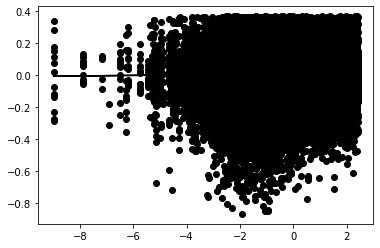

0.4449038906742093

In [100]:
import matplotlib.pyplot as plt

x = df_adj['ebitda_adj']
x = np.log(x)
y = y

plt.scatter(x.tolist(), y.tolist(), color='black')
np.max(x1)
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color='black')
print(a, b)
plt.show()
len(df_adj[df_adj["RETX"] < 0])/len(df_adj)